In [22]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df.head(2)

AWS_ID             TM    TA  Wind X.
0     108  2016-07-01 00  24.2   2.3  =
1     108  2016-07-01 01  24.3   2.3  =

In [24]:
len(df)

5886

In [25]:
len(df["TM"].unique())

2943

In [27]:
df = df.loc[df["AWS_ID"] == 108, ]

In [ ]:
df["TM"] = pd.to_datetime(df["TM"])
df = df.set_index("TM")

In [ ]:
df.head(2)

In [30]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [31]:
result = seasonal_decompose(df["TA"], model = "additive")

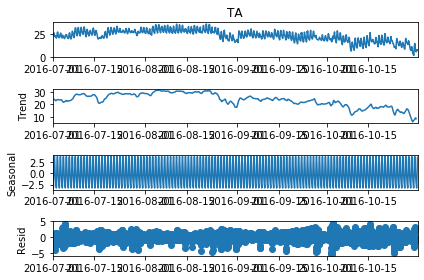

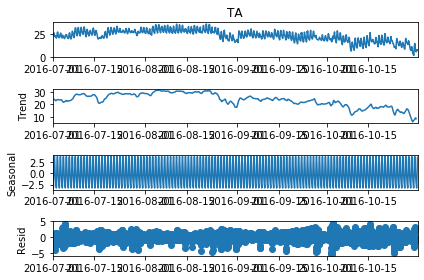

In [32]:
result.plot()

In [ ]:
result_100 = seasonal_decompose(df.iloc[:100, 1], model = "additive")
result_100.plot()

In [39]:
type(result_100.resid)

pandas.core.series.Series

In [40]:
df_td = pd.DataFrame({"origin": df["TA"],
                      "trend": result.trend,
                      "seasonal": result.seasonal,
                      "resid": result.resid})
df_td.head(2)

origin  trend  seasonal  resid
TM                                                 
2016-07-01 00:00:00    24.2    NaN -1.418880    NaN
2016-07-01 01:00:00    24.3    NaN -1.789697    NaN

In [41]:
from statsmodels.api import Logit

In [ ]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(2)

In [45]:
model = Logit(df["admit"], df.drop("admit", axis = 1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                 0.06176
Time:                        10:08:48   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
==============================================================================
"""

In [46]:
import numpy as np

In [47]:
np.exp(model.params) # Odds Ratio

gre     1.001478
gpa     0.995842
rank    0.511945
dtype: float64

In [48]:
pred = model.predict(df.drop("admit", axis = 1))
pred[:3] # 예측 확률값

0    0.188105
1    0.259410
2    0.621390
dtype: float64

문턱값(임계값, threshold)이 0.5로 주어진 경우 다음과 같이 분류

In [49]:
pred_class = (pred > 0.5) + 0 # 1
pred_class = np.where(pred > 0.5, 1, 0) # 2

In [52]:
from sklearn.metrics import roc_auc_score

In [55]:
# roc_auc_score(y_true = df["admit"], y_score = pred_class) # XXXXX
roc_auc_score(y_true = df["admit"], y_score = pred) # AUC

0.6685558535952237

roc_auc_score() 함수로 AUC를 산출하고자 할 때는 반드시 예측 분류값이 아닌 예측 확률값을 입력으로 해야 한다.

In [56]:
from sklearn.metrics import f1_score

In [57]:
f1_score(y_true = df["admit"], y_pred = pred_class)

0.35359116022099446

In [62]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv("classification_data_01.csv")
df.head(2)

Variance  Skewness  Curtosis  Entropy  Class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0

In [61]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20,
                                                    random_state = 123)

In [65]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
clf.feature_importances_

array([0.60782861, 0.2058916 , 0.15536055, 0.03091924])

In [66]:
y_pred = clf.predict(X_test)

In [67]:
f1_score(y_true = y_test, y_pred = y_pred)

0.9565217391304348

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_test, y_pred = y_pred)

0.95

In [72]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
iris = pd.read_csv("iris_xlsx.csv")
iris.head(2)

In [75]:
iris["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
iris["is_ver"] = (iris["Species"] == "versicolor") + 0
pd.crosstab(iris["Species"], iris["is_ver"])

is_ver       0   1
Species           
setosa      50   0
versicolor   0  50
virginica   50   0

In [77]:
iris_train, iris_test = train_test_split(iris, train_size = 0.7,
                                         random_state = 123)

In [78]:
model = GaussianNB().fit(X = iris_train.iloc[:, :4],
                         y = iris_train["is_ver"])

In [85]:
model.theta_

array([[5.78923077, 3.18461538, 3.55384615, 1.16      ],
       [6.        , 2.8325    , 4.2975    , 1.35      ]])

In [80]:
pred1 = model.predict(iris_test.iloc[:, :4])
pred1

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0])

In [83]:
pred2 = model.predict_proba(iris_test.iloc[:, :4])
pred2.round(3)

array([[0.035, 0.965],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.042, 0.958],
       [1.   , 0.   ],
       [0.342, 0.658],
       [0.017, 0.983],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.028, 0.972],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.062, 0.938],
       [0.901, 0.099],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.027, 0.973],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.077, 0.923],
       [1.   , 0.   ],
       [0.395, 0.605],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.897, 0.103],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.063, 0.937],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.112, 0.888],
       [0.832, 0.168],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.032, 0.968],
       [0.826, 0.174],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1. 